In [1]:
import sys
sys.path.append(r'C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio/Classification/titanic_version_1')

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
import yaml

# open yaml
yaml_path = r"C:\Users\gustavo\Documents\Data Science\08-GitHub\Portifolio\Classification\titanic_version_1\src\config.yaml"
with open(yaml_path, "r", encoding="utf-8") as f:
    config = yaml.safe_load(f)
    


   
    
if __name__ == "__main__":
    X_train_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['X_train'])
    
    X_val_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['X_val'])
    
    y_train_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['y_train'])
    
    y_val_feat_sel = os.path.join(
            config['feat_selection']['path'],
            config['feat_selection']['y_val'])
    
    params = {        
        'X_train_feat_sel':X_train_feat_sel,
        'X_val_feat_sel':X_val_feat_sel,
        'y_train_feat_sel':y_train_feat_sel,
        'y_val_feat_sel':y_val_feat_sel,
        'save_plot':config['save_reports']['path_plot'],
        'save_report':config['save_reports']['path_reports']
        }

    

In [6]:
from sklearn.feature_selection import mutual_info_classif

In [2]:

    
X_train = pd.read_parquet(params['X_train_feat_sel'])
X_val = pd.read_parquet(params['X_val_feat_sel'])
y_train = pd.read_parquet(params['y_train_feat_sel'])
y_val = pd.read_parquet(params['y_val_feat_sel'])
    
cols = X_train.filter(like='categorical').columns.tolist()    
    
y_train = y_train.astype('int')

    
    
    # Anova
select = X_train.columns.str.contains("numerical")
cols = X_train.columns
anova = f_classif(X_train[cols[select]], y_train)


c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
s = pd.Series(anova[1], index=cols[select])

In [4]:
anova_remove = anova[1] > 0.05

In [5]:
s[anova_remove].index

Index(['numerical_pipe__SibSp', 'numerical_pipe__Parch',
       'numerical_pipe__FamilySize'],
      dtype='object')

In [9]:
mi = mutual_info_classif(X_train, y_train)

c:\Users\gustavo\anaconda3\envs\explain\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace=True)
# mi = mi.to_dict()

<Axes: >

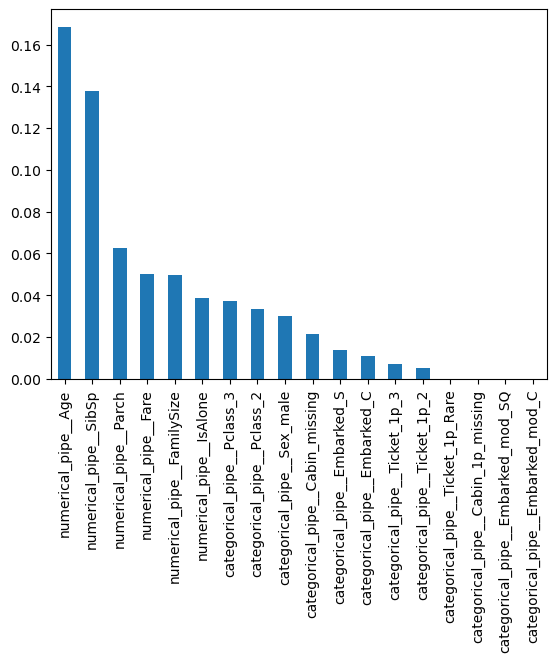

In [15]:
mi.plot.bar()